In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.interpolate import interp1d
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

In [2]:
models = ['ref', 'n=-4', 'n=-2']

reio = 'wReio'

cosmo={}
for M in models:
    cosmo[M] = Class()
    cosmo[M].set({'gauge':'newtonian',
                  'output':'tCl, lCl',
                  'omega_cdm':0.12038,
                  #'z_reio':11.357,
                  #'reionization_z_start_max':750,
                  #'z_reiomod_start':300,
                  'recfast_Nz0':20000,
                  'recfast_z_initial':1e4,
                  'recombination':'recfast',
                  #'recfast_H_frac':3e-4,
                  #'reio_parametrization':'reio_none',
                  #'100*theta_s':1.042143,
                  #'100*theta_s':1.02,
                  'background_verbose':5,
                  'input_verbose':5,
                  'h':0.67556,
                  'lensing':'yes',
                  'output_newtonian':'yes'
                 })
    if M == 'n=-4':
        cosmo[M].set({'f_bidm':0.99,
                  'm_bidm':1,
                  'bidm_type':'powerlaw','n_bidm':-4,'a_bidm':5e-4,'A_bidm':1.7e-41})
    if M == 'n=-2':
        cosmo[M].set({'f_bidm':0.99,
                  'm_bidm':1,
                  'bidm_type':'powerlaw','n_bidm':-2,'a_bidm':5e-3,'A_bidm':2.3e-33})
    cosmo[M].compute()
    print([M])


['ref']
['n=-4']
['n=-2']


In [3]:
print(sorted(cosmo['n=-4'].pars))

['A_bidm', 'a_bidm', 'background_verbose', 'bidm_type', 'f_bidm', 'gauge', 'h', 'input_verbose', 'lensing', 'm_bidm', 'n_bidm', 'omega_cdm', 'output', 'output_newtonian', 'recfast_Nz0', 'recfast_z_initial', 'recombination']


Text(0,0.5,'$R_\\chi / aH$')

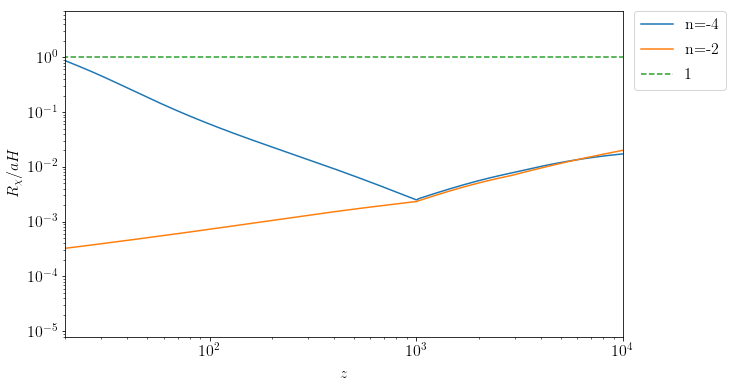

In [3]:
fig = plt.figure(1,figsize=(10,6))
ax = fig.add_subplot(111)
for M in models:
    if M != 'ref':
        Th = cosmo[M].get_thermodynamics()
        H = np.array([cosmo[M].Hubble(zz) for zz in Th['z']])
        ax.loglog(Th['z'],(1+Th['z'])*Th['Rbidm']/H,label=M)
ax.loglog([0,1e4],[1,1],linestyle='--',label='1')
ax.set_xlim([20,1e4])
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.set_xlabel('$z$',fontsize=16)
ax.set_ylabel('$R_\chi / aH$',fontsize=16)

Text(0,0.5,'T [K]')

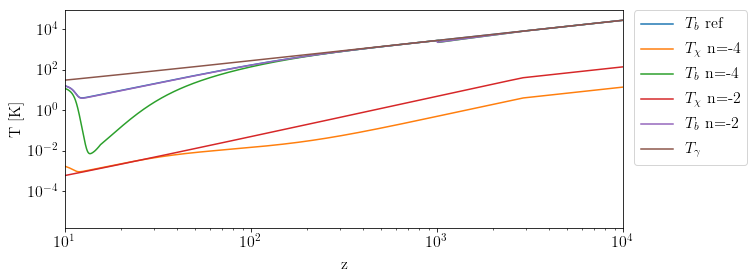

In [4]:
fig = plt.figure(1, figsize = (10,4))
ax = fig.add_subplot(111)
for M in models:
    Th = cosmo[M].get_thermodynamics()
    #print(Th.keys())
    if M != 'ref':
        ax.loglog(Th['z'],Th['Tbidm [K]'],label='$T_\chi$ '+M)
    ax.loglog(Th['z'],Th['Tb [K]'],label = '$T_b$ '+M)
ax.loglog(Th['z'],2.73*(Th['z']+1), label = '$T_\gamma$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.,fontsize=16)
ax.set_xlim(10,1e4)
ax.set_xlabel('z',fontsize=16)
ax.set_ylabel('T [K]',fontsize=16)

/home/markus/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


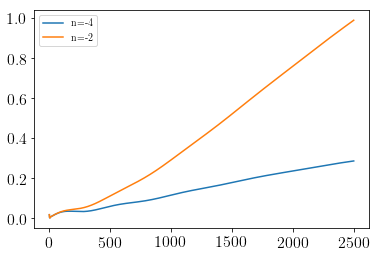

In [10]:
clref = cosmo['ref'].lensed_cl(2500)
ppref = clref['pp']
l = clref['ell']
for M in models:
    if M != 'ref':
        cl = cosmo[M].lensed_cl(2500)
        pp = cl['pp']
        plt.plot(l,(pp-ppref)/ppref,label=M)
plt.legend()

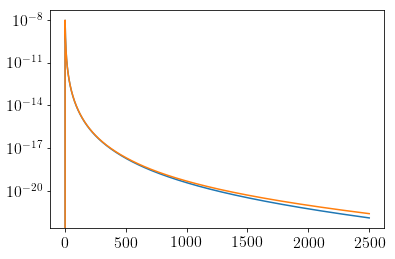

In [13]:
plt.semilogy(l,ppref)
plt.semilogy(l,pp)